# *와인 데이터 기술통계 분석 연습*

## 라이브러리 임포트

In [0]:
import numpy as np
from sklearn import datasets 
from collections import Counter as cc
import pandas as pd
import sqlite3

In [0]:
wine = datasets.load_wine()

##To SQL

In [0]:
pd_wine_target = pd.DataFrame(wine.target, columns=['target'])

In [6]:
pd_wine_target

,target
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


In [0]:
pd_wine = pd.DataFrame(wine['data'], columns=wine['feature_names'])

In [0]:
pdw = pd.concat([pd_wine_target, pd_wine], axis=1)

In [8]:
pdw

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,2,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,2,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,2,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [0]:
conn = sqlite3.connect('wine.db')

In [0]:
pdw.to_sql('wine_table', conn, if_exists='replace', index=False)

# 와인 데이터

In [0]:
wine = datasets.load_wine()

In [0]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [0]:
# print(wine.DESCR)

In [0]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [0]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [0]:
type(wine.data)

numpy.ndarray

In [0]:
len(wine.feature_names)

13

# 와인 기술통계

In [0]:
class_0 = wine.data[wine.target == 0]
class_1 = wine.data[wine.target == 1]
class_2 = wine.data[wine.target == 2]

In [0]:
target = [class_0, class_1, class_2]

## 

In [0]:
n = 0
matt = []

for j in target:
  mat = []
  print(wine.target_names[n])
  for i in range(len(wine.feature_names)):
    x = j[:, i]
    x_min = x.min()
    x_max = x.max()
    x_mean = x.mean()
    x_var = x.var()
    x_std = x.std()
    x_median = np.median(x)
    x_cnt = cc(j[:, i]) # 데이터에서 가장 많이 나온 값 카운트
    x_cntmax = x_cnt.most_common(1)
    x_cntmax = int(x_cntmax[0][0])

    mask_1 = ((x >= x_mean - 0.05*x_mean) & (x <= x_mean + 0.05*x_mean))
    mask_2 = ((x >= x_median - 0.05*x_median) & (x <= x_median + 0.05*x_median))
    mask_3 = ((x >= x_cntmax - 0.05*x_cntmax) & (x <= x_cntmax + 0.05*x_cntmax))

    selected_1 = x[mask_1]
    selected_2 = x[mask_2]
    selected_3 = x[mask_3]

    print('특징 :', wine.feature_names[i])
    print('평균 :', x_mean)
    print('중앙값 :', x_median)
    # print('분산 :', x_var)
    print('표준편차 :', x_std)
    print('최대값 :', x_max)
    print('최소값 :', x_min)
    print('최빈값 :', x_cntmax)
    print('\n')

    # print('범위 안에 들어가는 값 개수')
    # print('평균 :', len(selected_1))
    # print('중간값 :',len(selected_2))
    # print('최빈값 :',len(selected_3))
    # print(max(len(selected_1), len(selected_2), len(selected_3)))
    
    if max(len(selected_1), len(selected_2), len(selected_3)) == len(selected_1):
      print('대푯값 :', '평균({})'.format(x_mean))
    elif max(len(selected_1), len(selected_2), len(selected_3)) == len(selected_2):
      print('대푯값 :', '중간값({})'.format(x_median))
    else:
      print('대푯값 :', '최빈값({})'.format(x_cntmax))
    
    print('\n')

    
    mat += [[x_mean, x_median, x_std, x_var]]
  matt += [mat]
  n = n + 1

matt = np.array(matt)

In [0]:
matt

# 와인 plot

In [0]:
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt

wine = datasets.load_wine()

In [0]:
class_0 = wine.data[wine.target == 0]
class_1 = wine.data[wine.target == 1]
class_2 = wine.data[wine.target == 2]

In [0]:
len(class_2)

48

In [0]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

## 노가다

In [0]:
class0_alcohol = class_0[:, 0]
class0_malic_acid = class_0[:, 1]
class0_ash = class_0[:, 2]
class0_alcalinity_of_ash = class_0[:, 3]
class0_magnesium = class_0[:, 4]
class0_total_phenols = class_0[:, 5]
class0_flavanoids = class_0[:, 6]
class0_nonflavanoid_phenols = class_0[:, 7]
class0_proanthocyanins = class_0[:, 8]
class0_color_intensity = class_0[:, 9]
class0_hue = class_0[:, 10]
class0_od280_od315_of_diluted_wines = class_0[:, 11]
class0_proline = class_0[:, 12]

In [0]:
class1_alcohol = class_1[:, 0]
class1_malic_acid = class_1[:, 1]
class1_ash = class_1[:, 2]
class1_alcalinity_of_ash = class_1[:, 3]
class1_magnesium = class_1[:, 4]
class1_total_phenols = class_1[:, 5]
class1_flavanoids = class_1[:, 6]
class1_nonflavanoid_phenols = class_1[:, 7]
class1_proanthocyanins = class_1[:, 8]
class1_color_intensity = class_1[:, 9]
class1_hue = class_1[:, 10]
class1_od280_od315_of_diluted_wines = class_1[:, 11]
class1_proline = class_1[:, 12]

In [0]:
class2_alcohol = class_2[:, 0]
class2_malic_acid = class_2[:, 1]
class2_ash = class_2[:, 2]
class2_alcalinity_of_ash = class_2[:, 3]
class2_magnesium = class_2[:, 4]
class2_total_phenols = class_2[:, 5]
class2_flavanoids = class_2[:, 6]
class2_nonflavanoid_phenols = class_2[:, 7]
class2_proanthocyanins = class_2[:, 8]
class2_color_intensity = class_2[:, 9]
class2_hue = class_2[:, 10]
class2_od280_od315_of_diluted_wines = class_2[:, 11]
class2_proline = class_2[:, 12]

In [0]:
x = ['class_0', 'class_1', 'class_2']

In [0]:
class0_alcohol

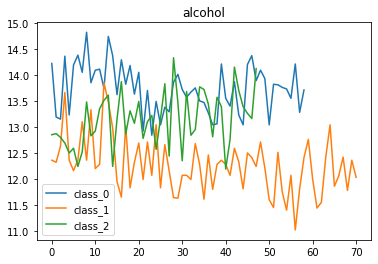

In [0]:
plt.plot(class0_alcohol, label = 'class_0')
plt.plot(class1_alcohol, label = 'class_1')
plt.plot(class2_alcohol, label = 'class_2')
plt.title('alcohol')
plt.legend()
plt.show()

## 반복문

In [0]:
"""
0 : 'alcohol',
1 : 'malic_acid',
2 : 'ash',
3 : 'alcalinity_of_ash',
4 : 'magnesium',
5 : 'total_phenols',
6 : 'flavanoids',
7 : 'nonflavanoid_phenols',
8 : 'proanthocyanins',
9 : 'color_intensity',
10 : 'hue',
11 : 'od280/od315_of_diluted_wines',
12 : 'proline'
 
 """

In [0]:
n = 0
class_0_features = []
class_1_features = []
class_2_features = []

while n < 3:
  for i in range(len(wine.feature_names)):
    x = wine.data[wine.target == n]
    print(wine.feature_names[i])
    value = x[:, i]
    if n == 0:
      class_0_features.append(value)
    elif n == 1:
      class_1_features.append(value)
    else:
      class_2_features.append(value)
    # print(value)
  n = n + 1

In [0]:
class_0_features

### wine 특성별 기본 그래프

In [0]:
for i in range(len(class_0_features)):
  plt.plot(class_0_features[i], label='class_0')
  plt.plot(class_1_features[i], label='class_1')
  plt.plot(class_2_features[i], label='class_2')
  plt.title(wine.feature_names[i])
  plt.legend()
  plt.show()




### wine 특성별 바 그래프

In [0]:
fea = ['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [0]:
for i in fea:
  print(i)

alcohol
malic_acid
ash
alcalinity_of_ash
magnesium
total_phenols
flavanoids
nonflavanoid_phenols
proanthocyanins
color_intensity
hue
od280/od315_of_diluted_wines
proline


In [0]:
matt[0][0]

array([13.74474576, 13.75      ,  0.45819231,  0.20994019])